# PROBLEM STATEMENT

Bitcoin (BTC) - the most popular of cryptocurrencies - has developed from a niche project for IT-savvy people into a mainstream investment vehicle. The emergence of easy-to-access wallets and ETFs now allows a wide audience - from small retail speculators to large institutional investors - to invest into Bitcoin.**As an investment firm we are facing the question whether an allocation to Bitcoin could improve our fund's performance?**

To help answer this question, this report will analyze Bitcoin's performance since 2014, alongside the two other major asset classes in our fund, US equities and gold.

# Data description

Data used for the analysis:

Bitcoin and S&P 500 daily data (in US dollars)

"date" - date from September 17, 2014 to November 17, 2021

"open" - the price / index level at the beginning of the trading day

"high" - the highest level reached that day

"low" - the lowest level reached that day

"close" - the price / level at the closing of the trading day

"volume" - how many Bitcoin / shares in the companies that make up the index were traded that day
Inflation and gold as monthly data

"gold_usd" - price in usd of gold for that month

"cpi_us" - the inflation index for the US for that month (cpi = consumer price index)


In [1]:
#Importing Libraries

import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

plt.style.use('seaborn-paper')

# BITCOIN dataset

In [2]:
bitcoin_prices = pd.read_csv(r"C:\Users\Oliver Twist\Documents\Jupyter\Datasets\bitcoin-usd.csv", parse_dates = ['date'])
bitcoin_prices = bitcoin_prices.sort_values(by = 'date')
bitcoin_prices.set_index('date', inplace=True)
bitcoin_prices

,open,high,low,close,volume
date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,2.105680e+07
2014-09-18,456.859985,456.859985,413.104004,424.440002,3.448320e+07
2014-09-19,424.102997,427.834991,384.532013,394.795990,3.791970e+07
2014-09-20,394.673004,423.295990,389.882996,408.903992,3.686360e+07
2014-09-21,408.084991,412.425995,393.181000,398.821014,2.658010e+07
...,...,...,...,...,...
2021-11-13,64158.121094,64915.675781,63303.734375,64469.527344,3.047423e+10
2021-11-14,64455.371094,65495.179688,63647.808594,65466.839844,2.512209e+10
2021-11-15,65521.289063,66281.570313,63548.144531,63557.871094,3.055876e+10


In [3]:
bitcoin_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2619 entries, 2014-09-17 to 2021-11-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2615 non-null   float64
 1   high    2615 non-null   float64
 2   low     2615 non-null   float64
 3   close   2615 non-null   float64
 4   volume  2615 non-null   float64
dtypes: float64(5)
memory usage: 122.8 KB


# SP500 dataset

In [4]:
sp500_prices = pd.read_csv(r'C:\Users\Oliver Twist\Documents\Jupyter\Datasets\sp500.csv', parse_dates = ['date'])
sp500_prices = sp500_prices.sort_values(by = 'date')
sp500_prices.set_index('date', inplace=True)
sp500_prices

,open,high,low,close,volume
date,,,,,
2014-09-17,1999.300049,2010.739990,1993.290039,2001.569946,3209420000
2014-09-18,2003.069946,2012.339966,2003.069946,2011.359985,3235340000
2014-09-19,2012.739990,2019.260010,2006.589966,2010.400024,4880220000
2014-09-22,2009.079956,2009.079956,1991.010010,1994.290039,3349670000
2014-09-23,1992.780029,1995.410034,1982.770020,1982.770020,3279350000
...,...,...,...,...,...
2021-11-09,4707.250000,4708.529785,4670.870117,4685.250000,3110230000
2021-11-10,4670.259766,4684.850098,4630.859863,4646.709961,3581630000
2021-11-11,4659.390137,4664.549805,4648.310059,4649.270020,2623140000


In [5]:
sp500_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1805 entries, 2014-09-17 to 2021-11-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1805 non-null   float64
 1   high    1805 non-null   float64
 2   low     1805 non-null   float64
 3   close   1805 non-null   float64
 4   volume  1805 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 84.6 KB


# Gold and Inflation Data

In [6]:
monthly_data = pd.read_csv(r'C:\Users\Oliver Twist\Documents\Jupyter\Datasets\monthly_data.csv', parse_dates = ['date'])
monthly_data = monthly_data.sort_values(by = 'date')
monthly_data.set_index('date', inplace=True)
monthly_data

,gold_usd,cpi_us
date,,
2014-09-01,1241.330,237.852
2014-10-01,1223.565,238.031
2014-11-01,1176.413,237.433
2014-12-01,1200.440,236.151
2015-01-01,1249.333,234.812
...,...,...
2021-07-01,1774.800,271.696
2021-08-01,1817.000,273.003
2021-09-01,1816.700,273.567


In [7]:
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87 entries, 2014-09-01 to 2021-11-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gold_usd  87 non-null     float64
 1   cpi_us    87 non-null     float64
dtypes: float64(2)
memory usage: 2.0 KB


# Checking Missing Values

In [8]:
bitcoin_prices.isnull().sum()

open      4
high      4
low       4
close     4
volume    4
dtype: int64

In [9]:
sp500_prices.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [10]:
monthly_data.isnull().sum()

gold_usd    0
cpi_us      0
dtype: int64

# Data Cleaning

In [11]:
#Calculate simple returns of the assets over time :

bitcoin_prices['btc_returns'] = bitcoin_prices['close'].pct_change()
sp500_prices['sp_returns'] = sp500_prices['close'].pct_change()
monthly_data['gld_returns'] = monthly_data['gold_usd'].pct_change()

Upsample BTC and SP500 returns to monthly returns to match Gold returns :

In [12]:
btc_returns_monthly = bitcoin_prices[['btc_returns']].resample('M').apply(lambda x: ((x + 1).cumprod() - 1).last("D")) 
sp_returns_monthly = sp500_prices[['sp_returns']].resample('M').apply(lambda x: ((x + 1).cumprod() - 1).last("D")) 

Match dates and number of observations

Gold first date observation ~ BTC/SP500 last date observation :

In [13]:
btc_pct_monthly_returns = btc_returns_monthly[:-1].dropna().to_numpy() * 100
sp_pct_monthly_returns = sp_returns_monthly[:-1].dropna().to_numpy() *  100
gld_pct_monthly_returns = monthly_data['gld_returns'].dropna().to_numpy() * 100

Shift dates of BTC and S&P500 returns dataframes to match :

In [14]:
btc_returns_monthly['shifted_date'] = btc_returns_monthly.index + pd.TimedeltaIndex([1 for i in range(len(btc_returns_monthly))], unit='D')
sp_returns_monthly['shifted_date'] = sp_returns_monthly.index + pd.TimedeltaIndex([1 for i in range(len(sp_returns_monthly))], unit='D')


Create dataframe of monthly returns :

In [15]:
returns_df = pd.merge(btc_returns_monthly, sp_returns_monthly, on='shifted_date')
returns_df = pd.merge(returns_df, monthly_data[['gld_returns']], left_on='shifted_date', right_on='date')
returns_df = returns_df.rename(columns={'shifted_date':'date'})
returns_df.set_index('date', inplace=True)
returns_df.head()

,btc_returns,sp_returns,gld_returns
date,,,
2014-10-01,-0.153914,-0.014628,-0.014311
2014-11-01,-0.125659,0.023201,-0.038537
2014-12-01,0.117421,0.024534,0.020424
2015-01-01,-0.153034,-0.004189,0.040729
2015-02-01,-0.320835,-0.031041,-0.014594


In [16]:
returns_df.describe()

,btc_returns,sp_returns,gld_returns
count,86.000000,86.000000,86.000000
mean,0.082606,0.010581,0.004875
std,0.230754,0.041278,0.036174
min,-0.364116,-0.125119,-0.072679
25%,-0.075158,-0.004174,-0.017084
50%,0.064405,0.016253,0.001343
75%,0.233362,0.030130,0.027068
max,0.696288,0.126844,0.109133


# Hypothesis Test

In [17]:
# Calculate GLD moments

gld_mean_ret = np.mean(gld_pct_monthly_returns)
gld_ann_ret = ((1+gld_mean_ret)*12)-1
gld_vol = np.std(gld_pct_monthly_returns)
gld_ann_vol = gld_vol + np.sqrt(12)
gld_skew = stats.skew(gld_pct_monthly_returns)
gld_kurtosis = stats.kurtosis(gld_pct_monthly_returns)

p_value = stats.shapiro(gld_pct_monthly_returns)[1]
print("p-value:", p_value)
if p_value <= 0.05:
    print("Null hypothesis is rejected. The GOLD data are likely not normal.")
else:
    print("Null hypothesis not rejected. The GOLD data are likely normal.")

p-value: 0.681982696056366
Null hypothesis not rejected. The GOLD data are likely normal.


In [18]:
# Calculate S&P500 moments

sp_mean_ret = np.mean(sp_pct_monthly_returns)
sp_ann_ret = ((1+sp_mean_ret)*12)-1
sp_vol = np.std(sp_pct_monthly_returns)
sp_ann_vol = sp_vol * np.sqrt(12)
sp_skew = stats.skew(sp_pct_monthly_returns)
sp_kurtosis = stats.kurtosis(sp_pct_monthly_returns)

p_value = stats.shapiro(sp_pct_monthly_returns)[1]
print("p-value:", p_value)
if p_value <= 0.05:
    print("Null hypothesis is rejected. The S&P500 data are likely not normal.")
else:
    print("Null hypothesis not rejected. The S&P500 data are likely normal.")

p-value: 0.027456678450107574
Null hypothesis is rejected. The S&P500 data are likely not normal.


# Asset Price

the aim of an investor is to grow their capital by purchasing assets that increase in value. So, did Bitcoin increase in value? If so, by how much? How did this increase in value fare compare to other assets?

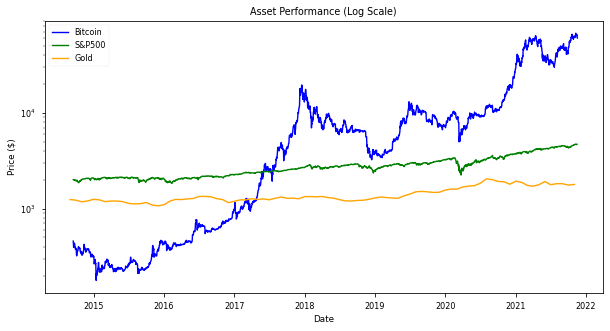

In [19]:
# Plot line graph of asset prices

std_figure_size = (10, 5)
plt.figure(figsize=std_figure_size)
plt.plot(bitcoin_prices['close'], label='Bitcoin', color='blue')
plt.plot(sp500_prices['close'], label='S&P500', color='green')
plt.plot(monthly_data['gold_usd'], label='Gold', color='orange')
plt.legend()
plt.title('Asset Performance (Log Scale)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.yscale('log')
plt.show()

Plotting the asset price of Bitcoin, S&P 500 and gold relative to each other reveals that Bitcoin significantly outperformed both the S&P 500 and gold.

# Bitcoin vs S&P500

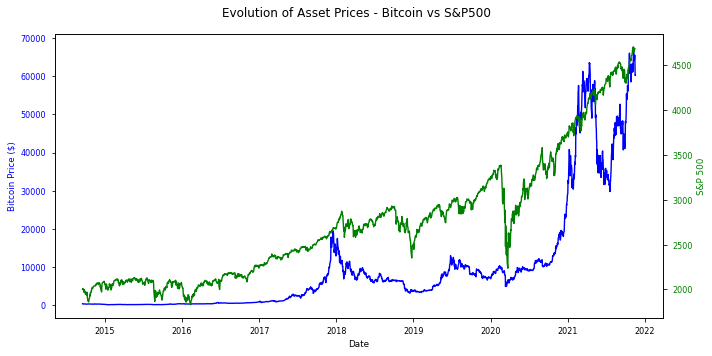

In [20]:
fig, ax1 = plt.subplots(figsize=(std_figure_size))
fig.suptitle('Evolution of Asset Prices - Bitcoin vs S&P500')

color = 'blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Bitcoin Price ($)', color=color)
ax1.plot(bitcoin_prices['close'], label='Bitcoin', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'green'
ax2.set_ylabel('S&P 500', color=color)  
ax2.plot(sp500_prices['close'], label='S&P 500', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()

S&P 500's performance is impressive, Bitcoin's performance is nothing of the short of astounding. Interestingly, most of Bitcoin's gains occured after the onset of the Coronavirus pandemic, whereas Inversely true for the S&P 500.

# Bitcoin vs Gold

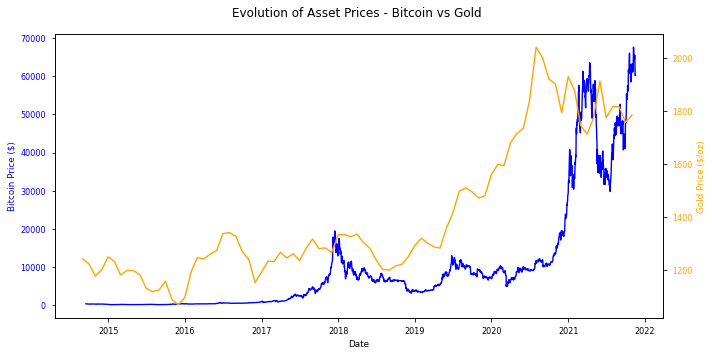

In [21]:
fig, ax1 = plt.subplots(figsize=std_figure_size)
fig.suptitle('Evolution of Asset Prices - Bitcoin vs Gold')

color = 'blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Bitcoin Price ($)', color=color)
ax1.plot(bitcoin_prices['close'], label='Bitcoin', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 
color = 'orange'
ax2.set_ylabel('Gold Price ($/oz)', color=color)  
ax2.plot(monthly_data['gold_usd'], label='Gold', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()

Bitcoin's price rose from 465 and close at 60,276(in dollars) after reaching an all-time high of $68,789.The price per ounce of gold climbed steadily from 1,241 to 1,785(in dollars) over the same period and all time high of 2,041(in dollars) during the height of the Coronavirus pandemic.

# Correlation

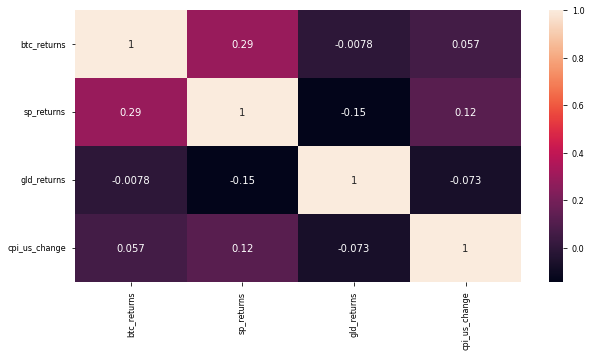

In [22]:
# use correlation matrix to build correlation heatmap

returns_inflation_df = returns_df.copy()
returns_inflation_df['cpi_us_change'] = monthly_data[['cpi_us']].pct_change().dropna().to_numpy()

plt.figure(figsize=std_figure_size)
correlation_matrix = returns_inflation_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

# Time series

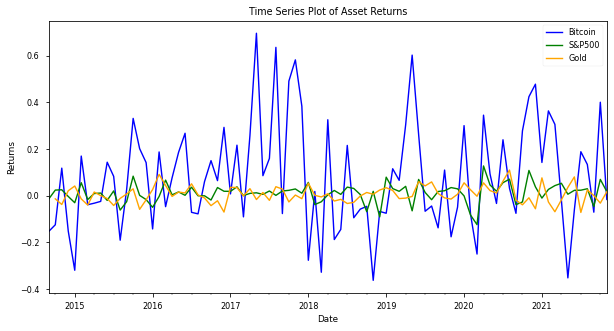

In [23]:
# Plot returns as time series

plt.figure(figsize=std_figure_size)
btc_returns_monthly.btc_returns.plot(label='Bitcoin', color='blue')
sp_returns_monthly.sp_returns.plot(label='S&P500', color='green')
monthly_data['gld_returns'].plot(label='Gold', color='orange')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Time Series Plot of Asset Returns')
plt.show()

The time series plot of monthly asset returns confirms the findings from the frequency distribution. Bitcoin returns vary significantly over time and are significantly more volatile than both the S&P 500 and gold returns.

Gold returns remained stationary, throughout the seven year period and exhibit the lowest amount of variability.

S&P 500 returns, more variability than gold returns and less variable and volatile than Bitcoin returns.

coupled with the frequency distribution, the time series deduction is that **Bitcoin is generally a more volatile asset than the S&P 500 or gold.**

# Future Prediction

In [24]:
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(returns_df['btc_returns'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',  
                          suppress_warnings = True,  
                          stepwise = True)          
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.85 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=51.040, Time=0.14 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=30.078, Time=0.88 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.03 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=49.775, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=47.966, Time=0.31 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=19.522, Time=1.84 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=4.77 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.78 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=24.368, Time=0.92 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=21.499, Time=2.04 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=19.862, Time=4.36 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=18.666, Time=1.43 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=27.792, Time=0.73 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=inf, Time=4.50 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   86
Model:             SARIMAX(0, 0, 1)x(2, 1, [], 12)   Log Likelihood                  -4.489
Date:                             Mon, 12 Sep 2022   AIC                             16.978
Time:                                     15:38:49   BIC                             26.194
Sample:                                 10-01-2014   HQIC                            20.654
                                      - 11-01-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3746      0.096      3.895      0.000       0.186       0.563
ar.S.L12      -0.8167      0.112     -7.282      0.000      -1.036      -0.597
ar.S.L24      -0.4542      0.112     -4.039      0.000      -0.675      -0.234
sigma2         0.0576      0.011      5.333      0.000       0.036       0.079
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.18
Prob(Q):                              0.79   Prob(JB):                         0.91
Heteroskedasticity (H):               1.31   Skew:                            -0.03
Prob(H) (two-sided):                  0.51   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
# Split data into train / test sets
train = returns_df['btc_returns'].iloc[:len(returns_df['btc_returns'])-12]
test = returns_df['btc_returns'].iloc[len(returns_df['btc_returns'])-12:] # set one year(12 months) for testing
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train, 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        btc_returns   No. Observations:                   74
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                  -4.300
Date:                            Mon, 12 Sep 2022   AIC                             18.601
Time:                                    15:38:53   BIC                             29.155
Sample:                                10-01-2014   HQIC                            22.737
                                     - 11-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7881      0.082     -9.623      0.000      -0.949      -0.628
ar.S.L12      -0.4784      0.620     -0.771      0.441      -1.695       0.738
ar.S.L24      -0.2257      0.491     -0.459      0.646      -1.189       0.738
ma.S.L12      -0.4488      0.718     -0.625      0.532      -1.856       0.958
sigma2         0.0549      0.013      4.109      0.000       0.029       0.081
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.98   Prob(JB):                         0.55
Heteroskedasticity (H):               2.00   Skew:                             0.34
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

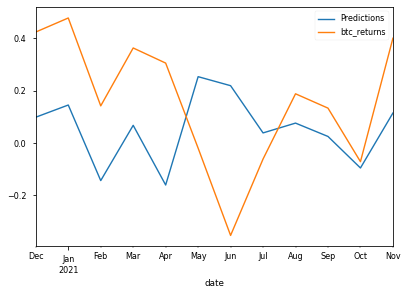

In [26]:

start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test.plot(legend = True)

In [27]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
print(rmse(test, predictions))
  
# Calculate mean squared error
mean_squared_error(test, predictions)

0.3057677373348253


0.09349390919485873

<AxesSubplot:xlabel='date'>

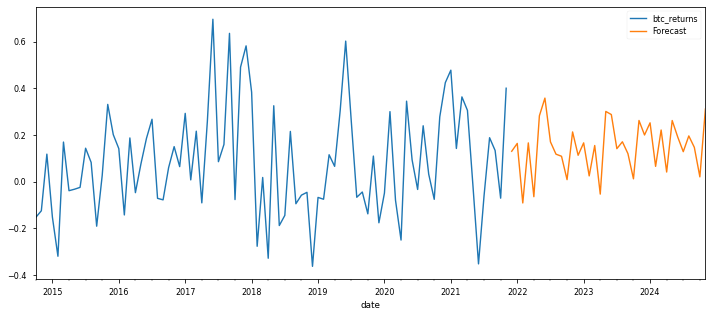

In [28]:

# Train the model on the full dataset
model = model = SARIMAX(returns_df['btc_returns'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(returns_df['btc_returns']), 
                          end = (len(returns_df['btc_returns'])-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
returns_df['btc_returns'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)